In [4]:
import seaborn as sns
from foof.util import create_psd
%matplotlib inline

%run ../bin/ping.py /Users/type/Code/syncological/data/test/ping_test2 --t 1.0 --stim 0.75 -h --I_e 0.7 0.7

usage: ping.py [-h] [-t TIME] [--stim STIM [STIM ...]] [--rate RATE]
               [--w_e W_E] [--w_i W_I] [--w_ei W_EI] [--w_ie W_IE]
               [--I_e I_E I_E] [--I_i I_I I_I] [--seed SEED]
               name

A sparse PING E-I model.

positional arguments:
  name                  Name of exp.

optional arguments:
  -h, --help            show this help message and exit
  -t TIME, --time TIME  Simulation run time (in ms) (default: 2)
  --stim STIM [STIM ...]
                        Simulus times (in ms) (default: [1.5])
  --rate RATE           Stimulus firing rate (approx) (default: 5)
  --w_e W_E             Input weight to E (msiemens) (default: 0.06)
  --w_i W_I             Input weight to E (msiemens) (default: 0.02)
  --w_ei W_EI           Weight I -> E (msiemens) (default: 1.0)
  --w_ie W_IE           Weight I -> E (msiemens) (default: 0.5)
  --I_e I_E I_E         E population drive (default: 0.3 0.3) (default: None)
  --I_i I_I I_I         I population drive (default: 0.1

WARNING  py.warnings: /Users/type/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "

  warnings.warn("No labelled objects found. "



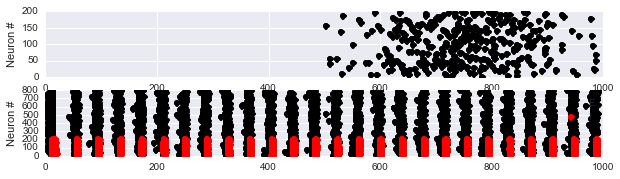

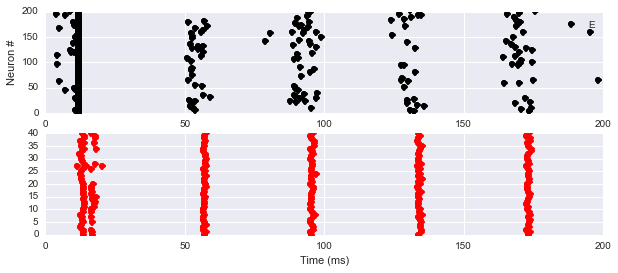

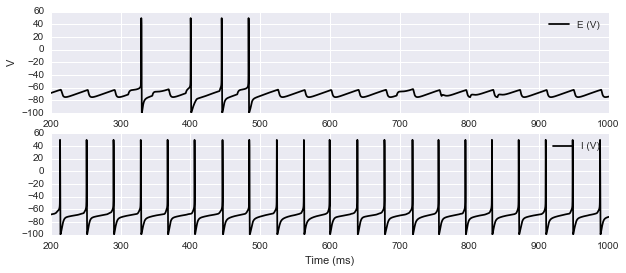

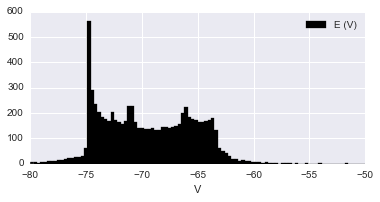

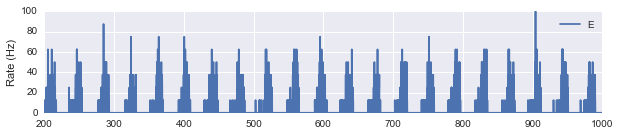

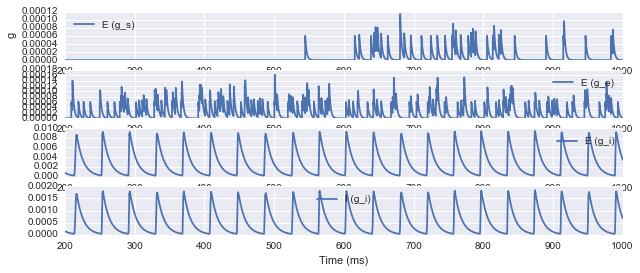

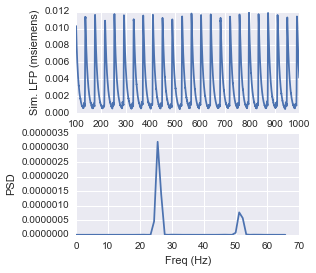

In [2]:
# Unpack
spikes_e = result['spikes_e']
spikes_i = result['spikes_i']
spikes_stim = result['spikes_stim']
pop_e = result['pop_e']
pop_i = result['pop_i']
voltages_e = result['voltages_e']
voltages_i = result['voltages_i']
t = 2000

# ------------------------------------------------------------
# Raster full
figure(figsize=(10, 4))
subplot(311)
plot(spikes_stim.t/ms, spikes_stim.i, 'o', label='', color='k')
xlim(0,1000)
ylabel("Neuron #")
legend()

subplot(312)
plot(spikes_e.t/ms, spikes_e.i, 'o', label='E', color='k')
plot(spikes_i.t/ms, spikes_i.i, 'o', label='I', color='r')
ylabel("Neuron #")
legend()

# Raster zoom
figure(figsize=(10, 4))
subplot(211)
plot(spikes_e.t/ms, spikes_e.i, 'o', label='E', color='k')
ylabel("Neuron #")
ylim(0,200)
xlim(0,200)
legend()

subplot(212)
plot(spikes_i.t/ms, spikes_i.i, 'o', label='I', color='r')
xlabel("Time (ms)")
ylim(0,40)
xlim(0,200)

# ------------------------------------------------------------
# V 
tn = 2000
figure(figsize=(10,4))
subplot(211)
plot(voltages_e.t[tn:]/ms, voltages_e.V[0][tn:]/mvolt, label='E (V)', color='k')
# ylim(-90, -50)
ylabel("V")
legend()

subplot(212)
plot(voltages_i.t[tn:]/ms, voltages_i.V[0][tn:]/mvolt, label='I (V)', color='k')
xlabel("Time (ms)")
legend()

# V hist
figure(figsize=(6,6))
subplot(211)
hist(voltages_e.V[0][tn:]/mvolt, label='E (V)', color='k', bins=100, range=(-80, -50))
xlabel("V")
legend()

# ------------------------------------------------------------
# Pop rate
figure(figsize=(10,4))
subplot(211)
plot(pop_e.t[tn:]/ms, pop_e.rate[tn:]/Hz, label='E')
ylabel('Rate (Hz)')
legend()

# subplot(212)
# plot(pop_i.t[tn:]/ms, pop_i.rate[tn:]/Hz, label='I')
# xlabel("Time (ms)")
# legend()

# ------------------------------------------------------------
# gs
figure(figsize=(10,4))

subplot(411)
plot(voltages_e.t[tn:]/ms, voltages_e.g_s.sum(0)[tn:], label='E (g_s)')
ylabel("g")
legend(loc='best')

subplot(412)
plot(voltages_e.t[tn:]/ms, voltages_e.g_e.sum(0)[tn:], label='E (g_e)')
legend(loc='best')

subplot(413)
plot(voltages_e.t[tn:]/ms, voltages_e.g_i.sum(0)[tn:], label='E (g_i)')
legend(loc='best')

subplot(414)
plot(voltages_i.t[tn:]/ms, voltages_i.g_i.sum(0)[tn:], label='I (g_i)')
xlabel("Time (ms)")
legend(loc='best')

# ------------------------------------------------------------
# Spectra
lfp = (np.abs(voltages_e.g_e.sum(0)) + 
        np.abs(voltages_e.g_i.sum(0)) +
        np.abs(voltages_i.g_e.sum(0)) +
        np.abs(voltages_i.g_i.sum(0)))

lfp = lfp[1000:]  # Drop initial spike

figure(figsize=(4,4))
subplot(211)
plot(voltages_i.t[1000:]/ms, lfp, label='LFP')
xlabel("Time (ms)")
ylabel("Sim. LFP (msiemens)")

subplot(212)
fs, spec = create_psd(lfp, 10000)
plot(fs[:60], spec[:60])
xlabel("Freq (Hz)")
ylabel("PSD")

In [3]:
%%javascript
if($(IPython.toolbar.selector.concat(' > #kill-run-all')).length == 0){
  IPython.toolbar.add_buttons_group([
        {
             'label'   : 'kill and run-all',
             'icon'    : 'fa fa-angle-double-down',
             'callback': function(){
                 IPython.notebook.kernel.restart();
                 $(IPython.events).one('kernel_ready.Kernel',
                                       function(){IPython.notebook.execute_all_cells();});
             }
        }
    ], 'kill-run-all');
}

<IPython.core.display.Javascript object>